In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)
print(sys.version_info)
for module in mpl, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.9.1
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.5.2
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
import pprint  # 输出格式更好看

pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [5]:
from sklearn.model_selection import train_test_split

x_train_all, x_text, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)  # 训练集
print(x_valid.shape, y_valid.shape)  # 验证集
print(x_text.shape, y_test.shape)  # 测试集

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_text_scaled = scaler.transform(x_text)

In [7]:
# 特征数目
x_train_scaled.shape[1:]

(8,)

In [8]:
# 标准化后的值
x_train_scaled[1]

array([-0.29807281,  0.35226166, -0.10920508, -0.25055521, -0.03406402,
       -0.006034  ,  1.08055484, -1.06113817])

In [9]:
# 回归模型
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)  # 结果层只有1个节点
])
model.summary()
model.compile(loss='mean_squared_error',   # 均方差
              optimizer='sgd')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 0.8567 - val_loss: 0.9125
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.9709 - val_loss: 0.7021
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5230 - val_loss: 0.4775
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4472 - val_loss: 0.4399
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4216 - val_loss: 0.4249
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4037 - val_loss: 0.4097
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.3941 - val_loss: 0.4017
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3839 - val_loss: 0.3918
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3865 - val_loss: 0.3869
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3887 - val_lo

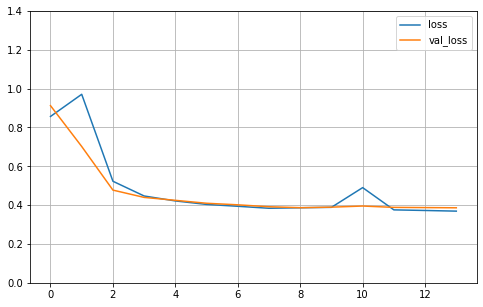

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1.4)
    plt.show()

plot_learning_curves(history)

In [13]:
model.evaluate(x_text_scaled, y_test, verbose=0)

0.3875328600406647